In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn import decomposition
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction import text

from wordcloud import WordCloud, STOPWORDS



In [2]:
#Load csv file into pandas data frame
df = pd.read_csv('All_Reviews.csv')
df.pop('Unnamed: 0')
df['review text'] = df['review text'].fillna("")
#df

# Text Mining

# Pre-processing reviews

In [3]:
#Create function to remove punctations

text = 'This is a sampled sentence, showing off the process of the word filtration system.'
# text = 'filtrate filtration filter'

def punk_remove(text):
    words = nltk.word_tokenize(text)
    new_words = [word.lower() for word in words if word.isalnum()]
    return new_words

rempunk_text = punk_remove(text)
print(rempunk_text)

['this', 'is', 'a', 'sampled', 'sentence', 'showing', 'off', 'the', 'process', 'of', 'the', 'word', 'filtration', 'system']


In [4]:
#Create function to filter a review

stop_words = set(stopwords.words('english'))  
def filter_text(text):
    word_tokens = text
    filtered_text = [w for w in word_tokens if not w in stop_words]
    filtered_text = []  
    for w in word_tokens:  
        if w not in stop_words:  
            filtered_text.append(w)
    return filtered_text

filtered_text = filter_text(rempunk_text)
print(filtered_text)

['sampled', 'sentence', 'showing', 'process', 'word', 'filtration', 'system']


In [5]:
#Create function to perform stemming a list of words

ps = PorterStemmer()
def stem_text(text_list):
    stemmed_words=[]
    for w in text_list:
        stemmed_words.append(ps.stem(w))
    return stemmed_words

stemmed_words = stem_text(filtered_text)
print(stemmed_words)

['sampl', 'sentenc', 'show', 'process', 'word', 'filtrat', 'system']


In [6]:
#Create function to lemmatize a list of words

lem = WordNetLemmatizer()
def lemmatize_text(text_list):
    lemmatized_words=[]
    for w in text_list:
        lemmatized_words.append(lem.lemmatize(w,'v'))
    return lemmatized_words

lemmatized_words = lemmatize_text(filtered_text)
print(lemmatized_words)

['sample', 'sentence', 'show', 'process', 'word', 'filtration', 'system']


In [7]:
#Process all reviews and fill 'review processed' column
#df_temp = df.head(1000)
df['review processed'] = np.nan
for i in range(df.shape[0]):
    df['review processed'][i] = lemmatize_text(filter_text(stem_text(punk_remove(df['review text'][i]))))
    
df

<ipython-input-7-3c61ce5750f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review processed'][i] = lemmatize_text(filter_text(stem_text(punk_remove(df['review text'][i]))))
D:\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,filename,ranking,category,review ID,review name,reviewer's name,reviewer's profile,review rating,review date,review text,verified purchase,vine customer review of free product,images,image 1,image 2,image 3,image 4,review processed
0,Reviews/1_0984782850.csv,1.0,NaN,R32BJK81FRH8ME,A contemporary codex,@TheScott463,https://www.amazon.com/gp/profile/amzn1.accoun...,4,"August 1, 2019","Good examples, explanations, and problems. Tit...",True,False,NaN,NaN,NaN,NaN,NaN,"[good, exampl, explan, problem, titl, rip, cov..."
1,Reviews/1_0984782850.csv,1.0,NaN,RCIPQTOLBAOE6,great book to solidify knowledge,A & E Ingram,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"July 6, 2020",Used this book to practice for interviewing af...,True,False,NaN,NaN,NaN,NaN,NaN,"[use, thi, book, practic, interview, complet, ..."
2,Reviews/1_0984782850.csv,1.0,NaN,R3VU8PXI6SI58X,This revised edition is worth purchasing. Sur...,A Reviewer,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"March 22, 2017",This revised edition is worth purchasing. Sure...,False,False,NaN,NaN,NaN,NaN,NaN,"[thi, revis, edit, worth, purchas, sure, enoug..."
3,Reviews/1_0984782850.csv,1.0,NaN,R32XY85RY4W2LX,Must have for interview preparation!,A. P,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"December 21, 2015",This one's a must have for interview preparati...,True,False,NaN,NaN,NaN,NaN,NaN,"[thi, one, must, interview, prepar, thi, new, ..."
4,Reviews/1_0984782850.csv,1.0,NaN,R21KYICVT6BKWC,The best part is,A. Quesenberry,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"August 10, 2017",The definitive book to help you prepare for an...,False,False,NaN,NaN,NaN,NaN,NaN,"[definit, book, help, prepar, interview, much,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15903,Reviews/100_1840788119.csv,100.0,NaN,R1BS8378SXGVUH,easy to read,msbetty,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"April 30, 2020",I got this for a friend who has no idea about ...,True,False,NaN,NaN,NaN,NaN,NaN,"[get, thi, friend, ha, idea, comput]"
15904,Reviews/100_1840788119.csv,100.0,NaN,R3M3WGCVTP7UF5,Gift for a younng traveling man.,receivers sweet ok,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"August 17, 2019",WoW...I ordered this last night and it has bee...,True,False,NaN,NaN,NaN,NaN,NaN,"[wow, order, thi, last, night, ha, hand, deliv..."
15905,Reviews/100_1840788119.csv,100.0,NaN,R598W47BQ0DXS,Waste of paper.,relieved,https://www.amazon.com/gp/profile/amzn1.accoun...,1,"January 11, 2020",Did not provide any helpful information. Total...,True,False,NaN,NaN,NaN,NaN,NaN,"[provid, ani, help, inform, total, wast, money]"
15906,Reviews/100_1840788119.csv,100.0,NaN,R302EBDYXNZMS3,Nice but need larger writing for seniors,simigal42,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"September 16, 2019",Nice product but ordered in error had to trturn,True,False,NaN,NaN,NaN,NaN,NaN,"[nice, product, order, error, trturn]"


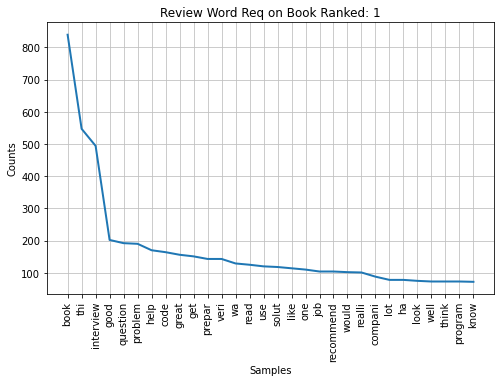

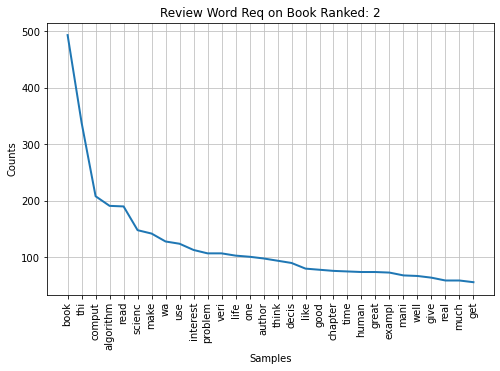

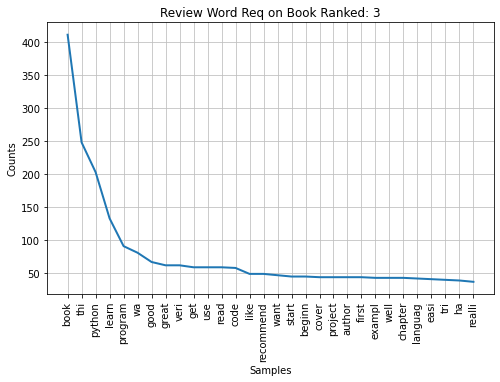

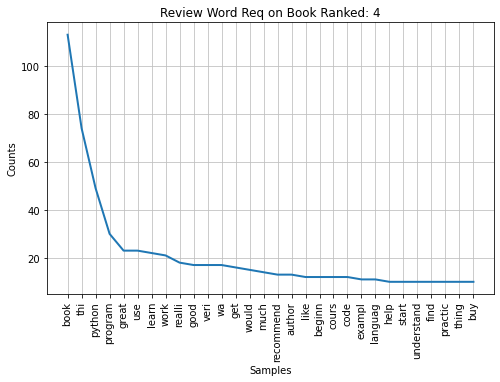

In [8]:
#Plot word frequencies of different ranking books

for rank in range(1,4+1):
    review = df['review processed'].copy()
    ranking = df['ranking'].copy()

    review = review[ranking==rank]
    ranking = ranking[ranking==rank]

    review = review.reset_index(drop='True')
    ranking = ranking.reset_index(drop='True')


    entire_wordset=[]
    for i in range(review.shape[0]):
        entire_wordset += review[i]

    fdist = FreqDist(entire_wordset)

    # Frequency Distribution Plot of the top 30 most used words
    plt.figure(figsize=(8,5))
    plt.title('Review Word Req on Book Ranked: '+str(rank))
    fdist.plot(30,cumulative=False)
    
plt.show()

In [9]:
#Plot different ranking books on

def freq_dict_of_list(words):
    unwanted_chars = ""
    wordfreq = {}
    for raw_word in words:
#         word = raw_word.strip(unwanted_chars)
        word=raw_word
        if word not in wordfreq:
            wordfreq[word] = 0 
        wordfreq[word] += 1
    return wordfreq


def freq_dict_of_book(rank):
    review = df['review processed'].copy()
    ranking = df['ranking'].copy()

    review = review[ranking==rank]
    ranking = ranking[ranking==rank]

    review = review.reset_index(drop='True')
    ranking = ranking.reset_index(drop='True')

    wordset=[]
    for i in range(review.shape[0]):
        wordset += review[i]

    return freq_dict_of_list(wordset)
    

def top_word_list(rank,num):
    word_freq = freq_dict_of_book(rank)

    words_ordered = [pair[0] for pair in sorted(word_freq.items(), key=lambda item: item[1])]
    words_ordered.reverse()
    
    return words_ordered[:num]


def find_freq_given(wordlist,rank=-1,wordlist_use=[],isScaled=True):
    freq_of_given_words=[None]*len(wordlist)
    if rank==-1:
        freq_dict = freq_dict_of_list(wordlist_use)
    else:
        freq_dict = freq_dict_of_book(rank)

    i=0
    for word in wordlist:
        if word not in freq_dict:
            freq_dict[word] = 0 
        freq_of_given_words[i] = freq_dict[word]
        i+=1
    if isScaled:
        return freq_of_given_words/np.array(freq_of_given_words).sum()
    return freq_of_given_words

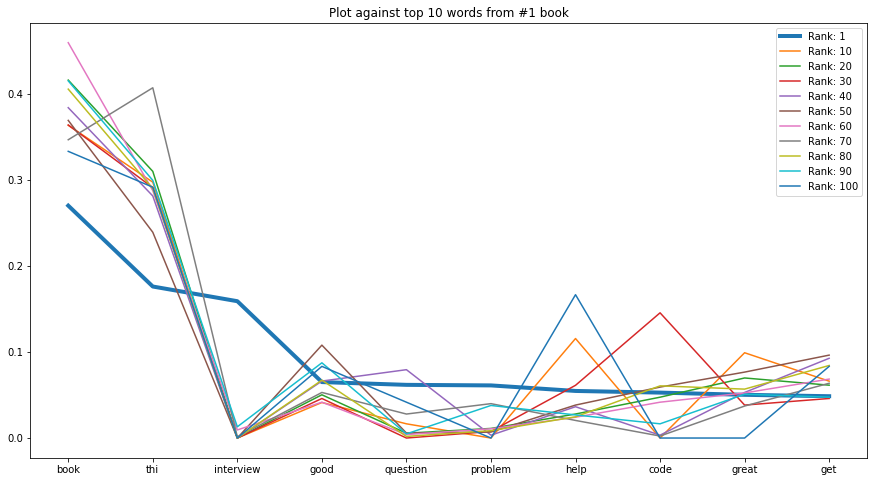

In [10]:
from_rank=1
num_top_words=10

word_list = top_word_list(from_rank,num_top_words)

plt.figure(figsize=(15,8))
freq_of_choose_book = find_freq_given(word_list,from_rank)
plt.plot(word_list,freq_of_choose_book,label='Rank: '+str(from_rank),linewidth=4)
if 1!=from_rank:
    plt.plot(word_list,find_freq_given(word_list,1),label='Rank: '+str(1))
for i in range(0,100+1,10):
    if i!=from_rank and i!=0:
        plt.plot(word_list,find_freq_given(word_list,i),label='Rank: '+str(i))

plt.legend()
plt.title('Plot against top '+str(num_top_words)+' words from #'+str(from_rank)+' book')
plt.show()

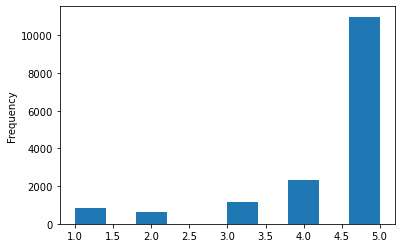

In [11]:
df['review rating'].plot.hist()

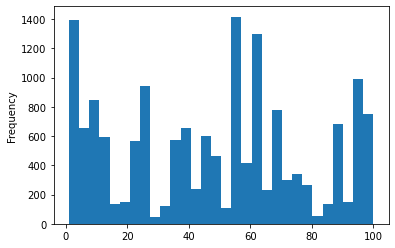

In [12]:
df['ranking'].plot.hist(bins=30)

# Vectorizing reviews

In [13]:
review_test = df.drop(columns = ['category','review ID',
        'review name', "reviewer's name", "reviewer's profile", 'review rating',
       'review date', 'verified purchase',
       'vine customer review of free product', 'images', 'image 1', 'image 2',
       'image 3', 'image 4'], axis = 1 )
review_test['review text'] = review_test['review text'].apply(str)
test_df = review_test.groupby('ranking')['review text'].apply(' '.join).reset_index()

kmeans_df = review_test.groupby('filename')['review text'].apply(' '.join).reset_index()

rating_test = df.groupby('ranking')['review rating'].mean().reset_index()
test_df['review rating'] = rating_test['review rating']

test_df

,ranking,review text,review rating
0,1.0,"Good examples, explanations, and problems. Tit...",4.470985
1,2.0,"It was alright for a minute, then it was blah ...",4.460452
2,3.0,"Like many others have said, the content is gre...",4.427350
3,4.0,Great and useful content. Good book Great book...,4.603175
4,5.0,great book overall goes through all concepts i...,4.530435
...,...,...,...
93,96.0,This is a great book for both beginners and ad...,4.566434
94,97.0,This book doesn't cover that much about Alexa ...,4.108108
95,98.0,"Overall, this is a good book on Game Programmi...",4.776471
96,99.0,What a fantastic book! I've looked at hundreds...,4.360308


In [14]:
vectorizer = TfidfVectorizer(strip_accents='ascii')
vectors = vectorizer.fit_transform(test_df['review text'])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df_vect = pd.DataFrame(denselist, columns=feature_names)
df_vect

,00,000,0001,000x,001,002,005,006,007,01,...,zombies,zone,zones,zoo,zookeeper,zoom,zooms,zoos,zuckerberg,zuckerburg
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.001612,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004817,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.001084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Splot Training and Testing Data

In [15]:
X = df_vect
# X.insert(0,'review rating',test_df['review rating'])
Y = test_df["ranking"]

print('Data size:',X.shape,Y.shape)

def train_test_split(X,Y,test_size=.20):
    step=int(1/test_size)
    X_test=X.iloc[::step,:]
    X_train=X.drop(X_test.index)
    Y_test=Y.iloc[::step]
    Y_train=Y.drop(Y_test.index)
    return(X_train,X_test,Y_train,Y_test)

Data size: (98, 24105) (98,)


# PCA

In [16]:
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y)

pca = decomposition.PCA(n_components=3)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

print('Training size:',X_train.shape,Y_train.shape)
print('Testing size:',X_test.shape,Y_test.shape)

Training size: (78, 3) (78,)
Testing size: (20, 3) (20,)


# Linear Regression

In [17]:
book_model = LinearRegression()
book_model.fit(X=X_train, y=Y_train)

Y_pred = book_model.predict(X=X_test)
LR_mae = (abs(Y_test-Y_pred)).mean()
LR_mae

24.18011180074965

In [18]:
def LR_train_test_error(X,Y,PCA_dim=None,use_PCA=True):
    #80:20 -> training:testing
    (X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,test_size=.20)
    
    #PCA
    if use_PCA:
        pca = decomposition.PCA(n_components=PCA_dim)
        pca.fit(X_train)
        X_train = pca.transform(X_train)
        X_test = pca.transform(X_test)
    
    #Linear Regression
    book_model = LinearRegression()
    book_model.fit(X=X_train, y=Y_train)
    
    #Mean Absolute Error
    Y_pred = book_model.predict(X=X_test)
    mae = (abs(Y_test-Y_pred)).mean()
    return mae

temp = X.drop(X.iloc[::5,:].index).shape
max_n = min(temp[0], temp[1]) - 1
print(max_n)

77


In [19]:
err=[]
for n in range(1,max_n):
    err.append(LR_train_test_error(X,Y,PCA_dim=n))
    
best_PCA_n = err.index(min(err))
print("Best n for PCA:", err[best_PCA_n])

Best n for PCA: 23.306838151299267


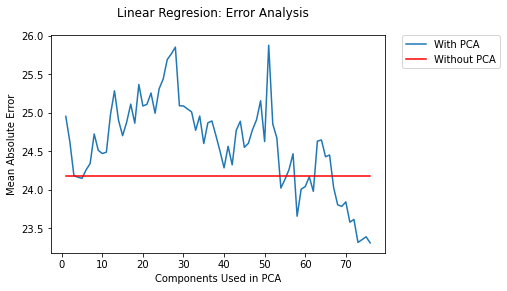

In [20]:
fig = plt.figure()

plt.plot([None]+err,label="With PCA")
yval = LR_mae
plt.plot([1,max_n-1],[yval,yval],'r',label="Without PCA")

fig.suptitle('Linear Regresion: Error Analysis')
plt.xlabel('Components Used in PCA')
plt.ylabel('Mean Absolute Error')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# K-Nearest Neighbors

In [21]:
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y)

pca = decomposition.PCA(n_components=best_PCA_n)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

mae_with_PCA = []
for k in range(1,max_n):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    mae = (abs(Y_test-predictions)).mean()
    mae_with_PCA.append(mae)
    
best_k_PCA = mae_with_PCA.index(min(mae_with_PCA))
print("Best k for KNN (with PCA):", best_k_PCA)
print("Best error for KNN (with PCA):", err[best_k_PCA])

mae_with_PCA = np.array(mae_with_PCA)

Best k for KNN (with PCA): 4
Best error for KNN (with PCA): 24.14612830874378


In [22]:
(X_train,X_test,Y_train,Y_test) = train_test_split(X,Y)

mae_without_PCA = []
for k in range(1,max_n):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    mae = (abs(Y_test-predictions)).mean()
    mae_without_PCA.append(mae)
    
best_k_noPCA = mae_without_PCA.index(min(mae_without_PCA))
print("Best k for KNN (without PCA):", best_k_noPCA)
print("Best error for KNN (without PCA):", err[best_k_noPCA])
    
mae_without_PCA = np.array(mae_without_PCA)

Best k for KNN (without PCA): 2
Best error for KNN (without PCA): 24.181853041881574


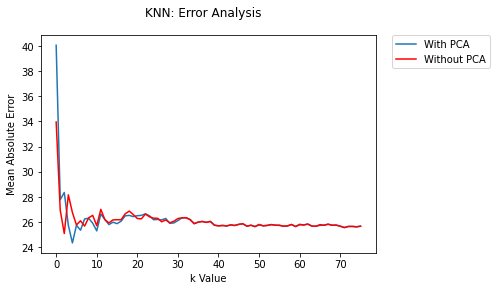

In [23]:
fig = plt.figure()

plt.plot(mae_with_PCA,label="With PCA")
yval = LR_train_test_error(X,Y,use_PCA=False)
plt.plot(mae_without_PCA,'r',label="Without PCA")

fig.suptitle('KNN: Error Analysis')
plt.xlabel('k Value')
plt.ylabel('Mean Absolute Error')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# K-Means

In [24]:
# Change to unicode
comments = kmeans_df["review text"].values.astype("U")
stop = list(stopwords.words('english'))
stop.extend('book great good like read'.split())
vectorizer = TfidfVectorizer(stop_words=set(stop))
features = vectorizer.fit_transform(comments)

In [25]:
k = 9
model = KMeans(n_clusters = k, init = 'k-means++',max_iter = 100, n_init = 1)
model.fit(features)

KMeans(max_iter=100, n_clusters=9, n_init=1)

In [26]:
kmeans_df['category'] = model.labels_
kmeans_df.head()

,filename,review text,category
0,Reviews/100_1840788119.csv,like various uses Had been working with an old...,8
1,Reviews/10_11951794X.csv,I found this book to be very helpful even if y...,2
2,Reviews/11_1119576245.csv,This book is designed for computer experts. Pe...,2
3,Reviews/12_1119679338.csv,As of this date I have not used this book very...,3
4,Reviews/13_0190865970.csv,Buy this book immediately. Brilliant. Helped m...,5


In [27]:
kmeans_df.tail()

,filename,review text,category
93,Reviews/96_1491904909.csv,This is a great book for both beginners and ad...,5
94,Reviews/97_1730771742.csv,This book doesn't cover that much about Alexa ...,8
95,Reviews/98_0990582906.csv,"Overall, this is a good book on Game Programmi...",0
96,Reviews/99_9781118531648.csv,What a fantastic book! I've looked at hundreds...,6
97,Reviews/9_1260454037.csv,It is covering all modules Such an invaluable ...,1


In [28]:
print("Words per catergory:")
cluster_rank = model.cluster_centers_.argsort()[:,::-1]
term = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in cluster_rank[i, : 10]: #print out 10 feature terms of each cluster
        print (" %s'" % term[j])
    print("----------------")

Words per catergory:
Cluster 0:
 python'
 programming'
 learning'
 code'
 one'
 well'
 data'
 get'
 would'
 machine'
----------------
Cluster 1:
 exam'
 test'
 cissp'
 study'
 comptia'
 practice'
 passed'
 001'
 pass'
 questions'
----------------
Cluster 2:
 excel'
 dax'
 365'
 office'
 dummies'
 easy'
 formulas'
 reference'
 use'
 learn'
----------------
Cluster 3:
 linux'
 commands'
 sql'
 teams'
 osint'
 reference'
 command'
 security'
 information'
 need'
----------------
Cluster 4:
 camera'
 nikon'
 d5600'
 photography'
 dslr'
 rebel'
 d3500'
 t7'
 cameras'
 manual'
----------------
Cluster 5:
 software'
 google'
 code'
 engineering'
 one'
 kurzweil'
 ml'
 tech'
 nichols'
 architecture'
----------------
Cluster 6:
 javascript'
 css'
 html'
 books'
 jquery'
 web'
 code'
 duckett'
 easy'
 design'
----------------
Cluster 7:
 bitcoin'
 blockchain'
 bitcoins'
 wallet'
 andreas'
 dummies'
 crypto'
 technical'
 understand'
 wallets'
----------------
Cluster 8:
 zoom'
 use'
 new'
 quickb

In [29]:
kmeans_clusters = pd.crosstab(kmeans_df["filename"],
                 kmeans_df["category"])
pd.set_option('display.max_rows', None, 'display.max_columns', None)
kmeans_clusters

category,0,1,2,3,4,5,6,7,8
filename,,,,,,,,,
Reviews/100_1840788119.csv,0,0,0,0,0,0,0,0,1
Reviews/10_11951794X.csv,0,0,1,0,0,0,0,0,0
Reviews/11_1119576245.csv,0,0,1,0,0,0,0,0,0
Reviews/12_1119679338.csv,0,0,0,1,0,0,0,0,0
Reviews/13_0190865970.csv,0,0,0,0,0,1,0,0,0
Reviews/14_1260122387.csv,0,1,0,0,0,0,0,0,0
Reviews/15_1119762936.csv,0,0,0,0,0,0,0,0,1
Reviews/16_1492075140.csv,0,0,0,0,0,0,0,0,1
Reviews/17_1119471567.csv,0,0,0,0,1,0,0,0,0


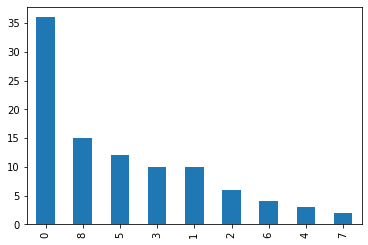

In [31]:
kmeans_df['category'].value_counts().plot(kind='bar')

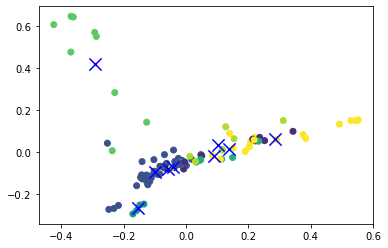

In [32]:
# Visualization
random_state = 0
cls = MiniBatchKMeans(n_clusters = 9, random_state = random_state)
cls.fit(features)

#reduce the features to 2D
pca = PCA(n_components = 2, random_state = random_state)
reduced_features = pca.fit_transform(features.toarray())

# reduce the clusters centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

plt.scatter(reduced_features[:,0],reduced_features[:,1], c = cls.predict(features))
plt.scatter(reduced_cluster_centers[:,0], reduced_cluster_centers[:,1], marker = 'x', s=150, c='b')

In [33]:
silhouette_score(features
                 ,labels = cls.predict(features))

0.04765866551870453

# Additional Visualizations

In [37]:
kmeans_df.rename(columns = {'review text': 'review'}, inplace =True)
category_df = kmeans_df.groupby("category")['review'].apply(' '.join).reset_index()
category_df

,category,review
0,0,"I seen this book popping up as a ""must read"" f..."
1,1,Great book for beginners. I bought to understa...
2,2,I found this book to be very helpful even if y...
3,3,As of this date I have not used this book very...
4,4,Told my daughter she had to read the whole thi...
5,5,Buy this book immediately. Brilliant. Helped m...
6,6,"Great book! organized, attractive layout, lear..."
7,7,Good starter book for those beginning their bl...
8,8,like various uses Had been working with an old...


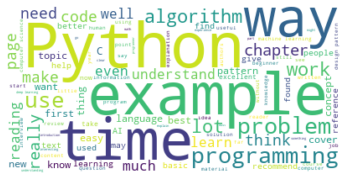

In [38]:
stopw = set(STOPWORDS)
stopw.update(["read","book", "many", "one", "will", "author", "books", "great", "good"])
test_zero = category_df.review[0]
cloud_zero = WordCloud(max_words = 100, stopwords = stopw, background_color = "white").generate(test_zero)
plt.imshow(cloud_zero, interpolation= 'bilinear')
plt.axis("off")
plt.show()

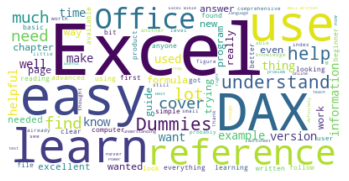

In [39]:
test_two = category_df.review[2]
cloud_two = WordCloud(max_words = 100, stopwords = stopw, background_color = "white").generate(test_two)
plt.imshow(cloud_two, interpolation= 'bilinear')
plt.axis("off")
plt.show()

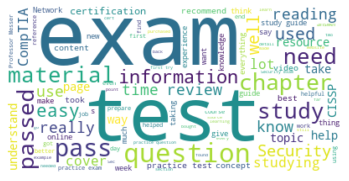

In [40]:
test_one = category_df.review[1]
cloud_one = WordCloud(max_words = 100, stopwords = stopw, background_color = "white").generate(test_one)
plt.imshow(cloud_one, interpolation= 'bilinear')
plt.axis("off")
plt.show()